<a href="https://colab.research.google.com/github/caifand/DMRL_THA/blob/master/THA4/THA4_dcf_apr26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#THA4
*Caifan Du   April 26, 2019*  
*PA 397C Data Management & Research Life Cycle*

---
My Take-Home-Assignment 4 seeks to answer the following research question: **What are the trends of the number of open access journals and repositories, respectively, over the years?**

For answering this question I first introduce 2 datasets.

## First dataset: Open Access Repositories

This dataset is retrieved from the [**_Directory of Open Access Repositories (OpenDOAR)_**](http://v2.sherpa.ac.uk/view/repository_by_country/countries=5Fby=5Fregion.html), which is a global directory of academic open access repositories. I downloaded the dataset directly from the web search interface of OpenDOAR and limited the query to only records of repositories in U.S. To import the downloaded dataset first:

In [29]:
import pandas as pd

# import first dataset: open access journals
oa_repos = pd.read_csv("https://raw.githubusercontent.com/caifand/DMRL_THA/master/THA4/input/data/doar_copy.csv")

# check imported dataset
print("1. Getting the first 10 records")
print(oa_repos.head(10))

print("\n2. Retrieving the last 10 records")
print(oa_repos.tail(10))

print("\n3. Getting column names")
print(oa_repos.columns)
print(list(oa_repos))

print("\n. Getting the shape of the dataset")
print(oa_repos.shape)

1. Getting the first 10 records
                               preferred_name  \
0  11th Joint Symposium on Neural Computation   
1          ACHS, Theses and Capstone Projects   
2                                        ARCH   
3                      ASU Digital Repository   
4                                      AUrora   
5   Academic Commons - Stony Brook University   
6                           Ackerman Archives   
7                  Afganistan Digital Library   
8                               AgEcon Search   
9                    Alaskas Digital Archives   

                                           name_name  \
0         11th Joint Symposium on Neural Computation   
1  American College of Healthcare Sciences, These...   
2                                               ARCH   
3                             ASU Digital Repository   
4             Auburn University Scholarly Repository   
5          Academic Commons - Stony Brook University   
6                                  A

All the 575 records document the open access repositories in U.S, current in March 2019 (the timepoint when I downloaded the data.) In order to identify the growth trend of open access repositories in U.S over the years available in the records, I need to tailor the dataset to only needed information.

In [0]:
# Preprocessing dataset 1

# Step 1: Drop needless columns
# 1.1 Check NA values in each column
oa_repos.isna().sum()

# 1.2 Only keep columns that are needed
oar = oa_repos[['preferred_name', 'year_established', 'date_created']]

In [31]:
# 1.3 Check current dataset

print("1. Getting the first 10 records")
print(oar.head(10))

print("\n2. Retrieving the last 10 records")
print(oar.tail(10))

print("\n3. Getting column names")
print(oar.columns)
print(list(oar))

print("\n. Getting the shape of the dataset")
print(oar.shape)

1. Getting the first 10 records
                               preferred_name  year_established  \
0  11th Joint Symposium on Neural Computation               NaN   
1          ACHS, Theses and Capstone Projects               NaN   
2                                        ARCH               NaN   
3                      ASU Digital Repository               NaN   
4                                      AUrora               NaN   
5   Academic Commons - Stony Brook University               NaN   
6                           Ackerman Archives            2002.0   
7                  Afganistan Digital Library               NaN   
8                               AgEcon Search            2003.0   
9                    Alaskas Digital Archives            2007.0   

       date_created  
0    8/3/2006 10:10  
1   7/21/2015 10:20  
2   3/19/2019 11:13  
3  11/12/2012 15:33  
4   3/27/2014 11:00  
5   3/20/2019 12:03  
6     9/2/2006 9:09  
7    1/3/2008 10:10  
8    8/3/2006 11:11  
9    7/20/

There exist a lot of missing values in the column "year_established". I intend to replace the missing ones with the corresponding year information from the "date_created" column. However, I need to extract the year information from the "datetime" values in the "date_created" column.

In [35]:
# Step 2: data transform
# check data types of each column
oar.dtypes

# transform data types "datetime" and "float" to "integer"
oar['date_created'] = oar['date_created'].astype('datetime64')
oar['date'] = pd.DatetimeIndex(oar['date_created']).year

oar.dtypes
print(oar.head(10))

                               preferred_name  year_established  \
0  11th Joint Symposium on Neural Computation               NaN   
1          ACHS, Theses and Capstone Projects               NaN   
2                                        ARCH               NaN   
3                      ASU Digital Repository               NaN   
4                                      AUrora               NaN   
5   Academic Commons - Stony Brook University               NaN   
6                           Ackerman Archives            2002.0   
7                  Afganistan Digital Library               NaN   
8                               AgEcon Search            2003.0   
9                    Alaskas Digital Archives            2007.0   

         date_created  date  
0 2006-08-03 10:10:00  2006  
1 2015-07-21 10:20:00  2015  
2 2019-03-19 11:13:00  2019  
3 2012-11-12 15:33:00  2012  
4 2014-03-27 11:00:00  2014  
5 2019-03-20 12:03:00  2019  
6 2006-09-02 09:09:00  2006  
7 2008-01-03 10:10:00 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In order to get the sole year information from "date_created", I appended an additional column "date" to the dataset. Here I am dropping the unneeded column again and rename the columns for convenience.

In [36]:
# drop unneeded column again
oar = oar[['preferred_name', 'year_established', 'date']]

# rename columns
oar.rename(columns={'preferred_name':'repository', 'year_established':'year', 'date':'date'}, inplace=True)

# check output
print(oar.head(10))
print(oar.tail(10))
print(oar.columns)
print(list(oar))
print(oar.shape)

                                   repository    year  date
0  11th Joint Symposium on Neural Computation     NaN  2006
1          ACHS, Theses and Capstone Projects     NaN  2015
2                                        ARCH     NaN  2019
3                      ASU Digital Repository     NaN  2012
4                                      AUrora     NaN  2014
5   Academic Commons - Stony Brook University     NaN  2019
6                           Ackerman Archives  2002.0  2006
7                  Afganistan Digital Library     NaN  2008
8                               AgEcon Search  2003.0  2006
9                    Alaskas Digital Archives  2007.0  2007
                                  repository    year  date
565                         eCommons@Cornell  2005.0  2005
566                             ePublish@UTD     NaN  2006
567        eScholarShare at Drake University     NaN  2006
568  eScholarship - University of California  2002.0  2006
569                          eScholarship@BC 

In [5]:
# Step 3: Dealing with missing values

# detecting missing values in dataframe
oar.isna().sum()

# replace missing values in column 'year' with the corresponding value in column 'date' in the same row
oar.year.fillna(oar.date, inplace=True)

# check the dataframe
print(oar.head(10))
print(oar.tail(10))
print(oar.columns)
print(list(oar))
print(oar.shape)

                                   repository    year  date
0  11th Joint Symposium on Neural Computation  2006.0  2006
1          ACHS, Theses and Capstone Projects  2015.0  2015
2                                        ARCH  2019.0  2019
3                      ASU Digital Repository  2012.0  2012
4                                      AUrora  2014.0  2014
5   Academic Commons - Stony Brook University  2019.0  2019
6                           Ackerman Archives  2002.0  2006
7                  Afganistan Digital Library  2008.0  2008
8                               AgEcon Search  2003.0  2006
9                    Alaskas Digital Archives  2007.0  2007
                                  repository    year  date
565                         eCommons@Cornell  2005.0  2005
566                             ePublish@UTD  2006.0  2006
567        eScholarShare at Drake University  2006.0  2006
568  eScholarship - University of California  2002.0  2006
569                          eScholarship@BC 

In [6]:
# then drop the column 'date' since now it's useless
oar = oar[['repository', 'year']]

# transform data type
oar['year'] = oar['year'].astype('int64')
oar.dtypes

# check output
print(oar.head(10))
print(oar.tail(10))
print(oar.columns)
print(list(oar))
print(oar.shape)

                                   repository  year
0  11th Joint Symposium on Neural Computation  2006
1          ACHS, Theses and Capstone Projects  2015
2                                        ARCH  2019
3                      ASU Digital Repository  2012
4                                      AUrora  2014
5   Academic Commons - Stony Brook University  2019
6                           Ackerman Archives  2002
7                  Afganistan Digital Library  2008
8                               AgEcon Search  2003
9                    Alaskas Digital Archives  2007
                                  repository  year
565                         eCommons@Cornell  2005
566                             ePublish@UTD  2006
567        eScholarShare at Drake University  2006
568  eScholarship - University of California  2002
569                          eScholarship@BC  2006
570                        eScholarship@UMMS  2006
571   eVols at University of Hawaii at Manoa  2009
572                 

Since finally I want to map the amount of repository over the years, which means the "year" variable will become the x-axis in the expected graph. I just transformed all the values in  "year" into integer values so they will look neat in the graph.

Next I calculate the amount of newly created open access repositories each year; then calculate the cumulative amount of existing open access repositories each year.

In [37]:
# count the amount of repositories by year
oar_y = oar.groupby('year', as_index=False).agg({"repository": "count"})

# check output
print(oar_y)
print(oar_y.columns)
print(list(oar_y))
print(oar_y.shape)

      year  repository
0   1987.0           1
1   1989.0           1
2   1991.0           2
3   1992.0           1
4   1994.0           2
5   1995.0           1
6   1996.0           3
7   1997.0           1
8   1998.0           1
9   1999.0           5
10  2000.0           3
11  2001.0           2
12  2002.0          14
13  2003.0           8
14  2004.0           6
15  2005.0           8
16  2006.0           4
17  2007.0           3
18  2008.0           3
19  2010.0           1
20  2014.0           2
Index(['year', 'repository'], dtype='object')
['year', 'repository']
(21, 2)


In [38]:
# calculate the cumulative sum of the repositories each year
oar_y['repository'] = oar_y['repository'].cumsum()
oar_y

,year,repository
0,1987.0,1
1,1989.0,2
2,1991.0,4
3,1992.0,5
4,1994.0,7
5,1995.0,8
6,1996.0,11
7,1997.0,12
8,1998.0,13
9,1999.0,18


The data about open access repositories is done now. I am moving to preprocess the second dataset about open access journals.

## Second Dataset: Open Access Journals

The second dataset is retrieved from the [**_Directory of Open Access Journals (DOAJ)_**](https://doaj.org/) It is an online directory indexing the scholarly open access journals worldwide. Still, when I downloaded the data I limited the query to only records in the United States. So, the imported dataset is a dataset containing all the registered open access scholarly journals in the U.S, current on March, 2019.

In [39]:
# import dataset
oa_journals = pd.read_csv("https://raw.githubusercontent.com/caifand/DMRL_THA/master/THA4/input/data/doaj_copy.csv")

# check the imported dataset

print("1. Getting the first 10 records")
print(oa_journals.head(10))

print("\n2. Retrieving the last 10 records")
print(oa_journals.tail(10))

print("\n3. Getting column names")
print(oa_journals.columns)
print(list(oa_journals))

print("\n. Getting the shape of the dataset")
print(oa_journals.shape)

1. Getting the first 10 records
                                   Journal title  \
0                             Angle Orthodontist   
1                         California Agriculture   
2                 College and Research Libraries   
3                           Florida Entomologist   
4           Greek, Roman, and Byzantine Studies    
5                                       Medicine   
6                       North Carolina Libraries   
7            Interamerican Journal of Psychology   
8  The Journal of the Rutgers University Library   
9                 The Review of Regional Studies   

                      Alternative title  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   
5                                   NaN   
6                                   NaN   
7  Revista Interamericana de Psicología   
8       

Then, I check the missing values in the dataset and only keep columns that I need.

In [40]:
# Preprosessing dataset 2

# Step1: Drop unnecessary columns
# 1.1 Check NA values in each column
oa_journals.isna().sum()

# 1.2 Drop needless columns
oaj = oa_journals[['Journal title', 'First calendar year journal provided online Open Access content']]

# rename columns
# oaj.columns = [['journal', 'year']]
oaj.rename(columns={'Journal title':'journal',
                    'First calendar year journal provided online Open Access content':'year'}, 
                 inplace=True)

# check output
print(oaj.head(10))
print(oaj.tail(10))
print(oaj.columns)
print(list(oaj))
print(oaj.shape)

                                         journal  year
0                             Angle Orthodontist  2004
1                         California Agriculture  1946
2                 College and Research Libraries  1939
3                           Florida Entomologist  1994
4           Greek, Roman, and Byzantine Studies   2004
5                                       Medicine  2014
6                       North Carolina Libraries  1942
7            Interamerican Journal of Psychology  2011
8  The Journal of the Rutgers University Library  2005
9                 The Review of Regional Studies  2011
                                               journal  year
676                            Meat and Muscle Biology  2017
677    Working Papers in Applied Linguistics and TESOL  2001
678  Journal of Research in Science, Mathematics an...  2018
679        AIMS Electronics and Electrical Engineering  2017
680       Nursing and Health Sciences Research Journal  2018
681                          

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Just like what I did to the first dataset, I then calculate the yearly cumulative sum of existing open access journals by calculating the amount of journals that just become open access every year.

In [41]:
#Step 2: data transform
#count the amount of journals by year
oaj_y = oaj.groupby('year', as_index=False).agg({"journal":"count"})

# check output
print(oaj_y)
print(oaj_y.columns)
print(list(oaj_y))
print(oaj_y.shape)

    year  journal
0   1881        1
1   1939        1
2   1942        1
3   1946        1
4   1972        1
5   1973        1
6   1976        1
7   1977        1
8   1980        1
9   1986        1
10  1988        1
11  1989        2
12  1990        3
13  1991        3
14  1993        5
15  1994        4
16  1995        5
17  1996        4
18  1997        4
19  1998        5
20  1999        6
21  2000       10
22  2001        7
23  2002       12
24  2003       14
25  2004       18
26  2005       21
27  2006       18
28  2007       16
29  2008       31
30  2009       24
31  2010       42
32  2011       50
33  2012       36
34  2013       66
35  2014       83
36  2015       56
37  2016       57
38  2017       56
39  2018       16
40  2019        1
Index(['year', 'journal'], dtype='object')
['year', 'journal']
(41, 2)


In [42]:
# calculate the cumulative sum of the journals each year
oaj_y['journal'] = oaj_y['journal'].cumsum()
oaj_y

,year,journal
0,1881,1
1,1939,2
2,1942,3
3,1946,4
4,1972,5
5,1973,6
6,1976,7
7,1977,8
8,1980,9
9,1986,10


## Merge datasets

In this step, I merge the two preprocessed datasets so that the cumulative sum of both existing open access repositories and open access journals can be demonstrated in the same table by year.

In [21]:
# merge 2 datasets by year
oajr = oar_y.merge(oaj_y, on='year', how='left')
oajr

,year,repository,journal
0,1987,1,NaN
1,1989,2,13.0
2,1991,4,19.0
3,1992,5,NaN
4,1994,7,28.0
5,1995,8,33.0
6,1996,11,37.0
7,1997,12,41.0
8,1998,13,46.0
9,1999,18,52.0


In [22]:
# transform data types
oajr['repository'] = oajr['repository'].astype('float64')
oajr.dtypes
oajr

,year,repository,journal
0,1987,1.0,NaN
1,1989,2.0,13.0
2,1991,4.0,19.0
3,1992,5.0,NaN
4,1994,7.0,28.0
5,1995,8.0,33.0
6,1996,11.0,37.0
7,1997,12.0,41.0
8,1998,13.0,46.0
9,1999,18.0,52.0


In [0]:
# write out the data to csv
oajr.to_csv("THA4_output.csv")

## Identify the trend over time by visualization

Finally got here. Now I use the merged dataset to plot the trend of both open access repositories and journals over the years. We can observe the growth trend of the two since 1980s in the following graph.

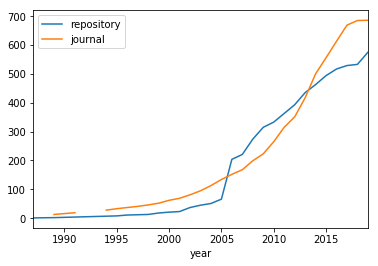

In [24]:
oajr.plot('year')

From the graph, we can notice that, even though there are missing values (I do not deal with them as I think they do not affect the general trend so I am not going to add any manipulated values into the missing spots at this moment), the overall trend of the growth of open access repositories and journals are positive since 1980s. It would be fun to track the progress in the upcoming years!
